In [1482]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score,accuracy_score, roc_curve,auc
%pylab inline
from numpy import mean
df = pd.read_csv(
    filepath_or_buffer="http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", 
    header=None, 
    sep=',')
df.columns=['p1', 'p2', 'p3', 'p4', 'p5','p6','p7','p8','p9',"p10",'p11', 'p12', 'p13', 'p14', 'p15','p16','p17']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

Populating the interactive namespace from numpy and matplotlib


In [1483]:
df = df[df.p1 != "?"]
df = df[df.p2 != "?"]
df = df[df.p3 != "?"]
df = df[df.p4 != "?"]
df = df[df.p5 != "?"]
df = df[df.p6 != "?"]
df = df[df.p7 != "?"]
df = df[df.p8 != "?"]
df = df[df.p9 != "?"]
df = df[df.p10 != "?"]
df = df[df.p11 != "?"]
df = df[df.p12 != "?"]
df = df[df.p13 != "?"]
df = df[df.p14 != "?"]
df = df[df.p15 != "?"]
df = df[df.p16 != "?"]
df = df[df.p17 != "?"].reset_index(drop=True)

In [1484]:
for i in range (len(df["p1"])):
    for j in df:
        if j!="p1":
            if df[j][i]=="y": 
                df.loc[i,j]=1
            else: df.loc[i,j]=0
        else: 
            if df[j][i]=="democrat": df.loc[i,j]=0
            else: df.loc[i,j]=1

In [1485]:
def Xs(X,list_obj):
    list_prz=[]
    for i in list_obj:
        prz=[]
        for j in range (len(X[i])):
            if X[i][j]==1: prz.append(j)
        list_prz.append(prz)
    l1=[i for i in range (len(X[i]))]
    for l in list_prz:
        l1=list(set(l) & set(l1))
    return(sorted(l1))
        

In [1486]:
def Ys(X,list_prz):
    list_obj=[]
    for obj in range(len(X)):
        f=1
        for i in list_prz:
            if X[obj][i]!=1: f=0
        if f==1: list_obj.append(obj)
    return(list(list_obj))
            

In [1487]:
def intersect(l1,l2):
    inter=[]
    for i in range (len(l1)):
        if l1[i]==1 and l2[i]==1:
            inter.append(i)
    return(inter)

In [1488]:
def data_info(X,Y,data,x):
    X_p,X_n=[],[]
    for k in range(len(Y)):
        if Y[k]==1: X_p.append(X[k])
        if Y[k]==0: X_n.append(X[k])
    card_p,supp_p,conf_p,card_n,supp_n,conf_n=[],[],[],[],[],[]
    
    for p in (X_p):
        intersect_p=intersect(x,p)
        card_p.append(len(intersect_p))
        supp_p.append(len(Ys(X_p,intersect_p)))
        conf_p.append(len(Ys(X_n,intersect_p)))
    for n in  (X_n):
        intersect_n=intersect(x,n)
        card_n.append(len(intersect_n))
        supp_n.append(len(Ys(X_n,intersect_n)))
        conf_n.append(len(Ys(X_p,intersect_n)))
    features=[]
    features.append(min(card_p))
    features.append(sum(card_p) / float(len(card_p)))
    features.append(max(card_p))
    features.append(min(supp_p))
    features.append(sum(supp_p) / float(len(supp_p)))
    features.append(max(supp_p))
    features.append(min(conf_p))
    features.append(sum(conf_p) / float(len(conf_p)))
    features.append(max(conf_p))
                    
    features.append(min(card_n))
    features.append(sum(card_n) / float(len(card_n)))
    features.append(max(card_n))
    features.append(min(supp_n))
    features.append(sum(supp_n) / float(len(supp_n)))
    features.append(max(supp_n))
    features.append(min(conf_n))
    features.append(sum(conf_n) / float(len(conf_n)))
    features.append(max(conf_n))
    data=data.append(pd.Series(features,index=l),ignore_index=True)
    return(data)

In [1489]:
N=len(df["p1"])
N=int(N/5)
df_list2=[]
test_list=[]
df1=pd.concat([df[N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[:N]]).reset_index(drop=True))
df1=pd.concat([df[:N],df[2*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[N:2*N]]).reset_index(drop=True))
df1=pd.concat([df[:2*N],df[3*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[2*N:3*N]]).reset_index(drop=True))
df1=pd.concat([df[:3*N],df[4*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[3*N:4*N]]).reset_index(drop=True))
df1=pd.concat([df[:4*N]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[4*N:5*N]]).reset_index(drop=True))

In [1490]:
l=['min_card+',"av_card+","max_card+","min_supp+","av_supp+","max_supp+","min_conf+","av_conf+",'max_conf+','min_card-',"av_card-","max_card-","min_supp-","av_supp-","max_supp-","min_conf-","av_conf-",'max_conf-']
def cross_validation(df_list,test_list):
        accur=[]
        precis=[]
        rec=[]
        for k in range (len(df_list)):
            X_train = df_list[k].ix[:,1:].values
            y_train = df_list[k].ix[:,0].values
            X_test = test_list[k].ix[:,1:].values
            y_test = test_list[k].ix[:,0].values
            data = pd.DataFrame(columns=l)
            for i in range (len(X_train)):
                    X=X_train.copy()
                    Y=y_train.copy()
                    x=list(X).pop(i)
                    y=list(Y).pop(i)
                    data=data_info(X,Y,data,x)
            data1 = pd.DataFrame(columns=l)
            for x in X_test:
                    data1=data_info(X_train,y_train,data1,x)
            clf = tree.DecisionTreeClassifier(criterion='entropy')
            y, _ = pd.factorize(y_train)
            clf.fit(data, y)
            predict= clf.predict(data1)
            precision=precision_score(list(y_test), predict, average='binary')       
            recall=recall_score(list(y_test), predict, average='binary')
            accuracy=accuracy_score(list(y_test), predict)
            accur.append(accuracy)
            precis.append(precision)
            rec.append(recall)
            with open('tree.dot', 'w') as dotfile:
                export_graphviz(
                clf,
                dotfile,
                feature_names=l)
        return([mean(accur),mean(precis),mean(rec)])

In [1491]:
cv=cross_validation(df_list2,test_list)
print("Precision -",cv[1],"Recall -",cv[2],"Accuracy -",cv[0])

Precision - 0.945901960784 Recall - 0.872165013984 Accuracy - 0.917391304348


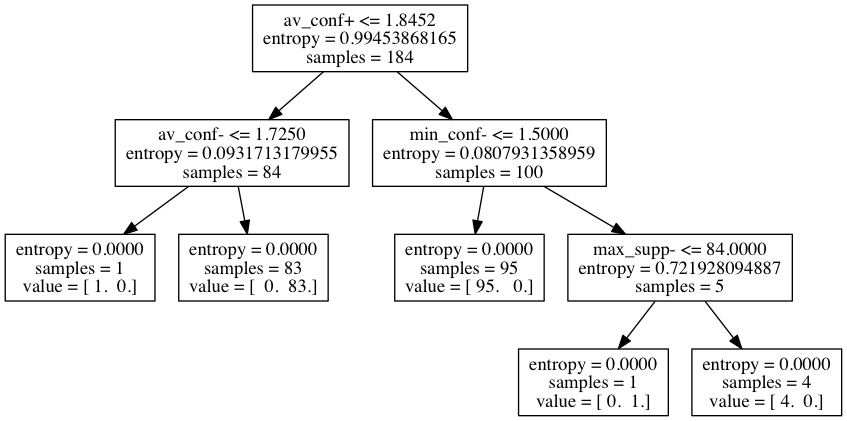

In [1492]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
from IPython.display import Image
Image(filename='tree.png') 

In [1493]:
df = pd.read_csv(
    filepath_or_buffer="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", 
    header=None, 
    sep=',',nrows=250)
df.columns=['class', 'p2', 'p3', 'p4', 'p5','p6','p7','p8','p9',"p10",'p11', 'p12', 'p13', 'p14', 'p15','p16','p17',"p18","p19","p20","p21","p22","p23"]
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [1495]:
df = df[df.p12 != "?"].reset_index(drop=True)

In [1497]:
df=pd.get_dummies(df, prefix=['class', 'p2',"p3",'p4', 'p5','p6','p7','p8','p9',"p10",'p11', 'p12', 'p13', 'p14','p15','p16','p17',"p18","p19","p20","p21","p22","p23"])
df = df.drop('class_p', 1)

In [1499]:
N=len(df["class_e"])
N=int(N/5)
df_list2=[]
test_list=[]
df1=pd.concat([df[N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[:N]]).reset_index(drop=True))
df1=pd.concat([df[:N],df[2*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[N:2*N]]).reset_index(drop=True))
df1=pd.concat([df[:2*N],df[3*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[2*N:3*N]]).reset_index(drop=True))
df1=pd.concat([df[:3*N],df[4*N:]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[3*N:4*N]]).reset_index(drop=True))
df1=pd.concat([df[:4*N]]).reset_index(drop=True)
df_list2.append(df1)
test_list.append(pd.concat([df[4*N:5*N]]).reset_index(drop=True))

In [1500]:
cv=cross_validation(df_list2,test_list)
print("Precision -",cv[1],"Recall -",cv[2],"Accuracy -",cv[0])

Precision - 0.8 Recall - 0.751111111111 Accuracy - 0.756


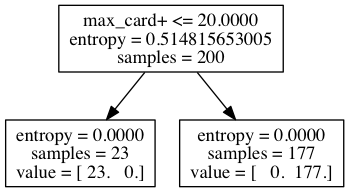

In [1501]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
from IPython.display import Image
Image(filename='tree.png') 